# K-Means Clustering Algorithm 

In [156]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

## 2D Clustering 

### 1. Generating the Clusters

In [80]:
x = np.append(np.random.normal(1.5, 1, 200), np.random.normal(5, 1, 200))
x = np.append(x,np.random.normal(-2,1,200))

In [81]:
y = np.append(np.random.normal(1.5, 1, 200), np.random.normal(5, 1, 200))
y = np.append(y,np.random.normal(-2,1,200))

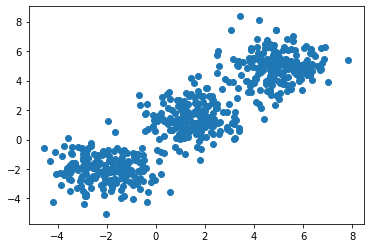

In [199]:
plt.scatter(x,y)

We have three clusters to segregate.

### 2. Clustering Algorithm

In [84]:
mu1, mu2, mu3 = 12*np.random.random(3) - 4

In [139]:
mu1, mu2, mu3

(5.157053968676511, -2.165311022759416, 5.0786423723012355)

In [200]:
def KMeansClusterer1D(values, n, init_mu, n_iter = 10 ):
    
    '''
    values : 1D Vector containing values to cluster
    n : Number of clusters to make
    init_mu : list containing 'n' values for initial centres
    
    RETURNS:
    new_mu : list of new clusters location
    radius : list of cluster radius
    '''
    
    assert len(init_mu) == n
    
    
    for i in range(n_iter):
        
        val_mu_diff = np.reshape(np.power(values - init_mu[0], 2), [-1,1])
        #To calculate x_i - mu_c 
        ## and
        #To calculate cluster which minimizes square of val_mu_diff
        for j in range(1,n):
            val_mu_diff = np.concatenate([ val_mu_diff, np.reshape(np.power(values - init_mu[j], 2), [-1,1]) ], axis = 1)
            
        c = np.argmin(val_mu_diff, axis = 1)
        
        #Updating Centroids
        new_mu = []
        for j in range(n):
            
            temp = values[c == j]
            new_mu.append(np.sum(temp) / len(temp))
        
        init_mu = new_mu
        
    
    #To calculate Radius of each cluster
    radius = []
    for j in range(n):
        temp = values[c == j]
        radius.append(np.abs(np.max(temp) - new_mu[j]))        
        
    return new_mu, radius

In [201]:
new_mu_x, rad_x = KMeansClusterer1D(x, 3 ,[mu1, mu2, mu3], 1000)

In [202]:
new_mu_x

[4.975920224149827, -2.048117222530764, 1.496062570250499]

In [203]:
rad_x

[2.8649971557860354, 1.743378403322101, 1.7367255053103032]

In [204]:
new_mu_y, rad_y = KMeansClusterer1D(y, 3 ,[mu1, mu2, mu3], 1000)

In [205]:
new_mu_y

[5.038553956823246, -2.005877576393779, 1.5157889557309736]

In [206]:
rad_y

[3.308057816376178, 1.7353647455283228, 1.738036665366932]

### 3. Final Result

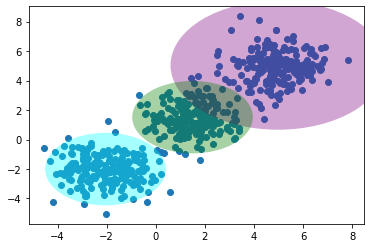

In [207]:
fig, ax = plt.subplots()
plt.scatter(x,y)


circle1 = plt.Circle((new_mu_x[0], new_mu_y[0]), np.sqrt(rad_x[0]**2 + rad_y[0]**2) ,alpha = 0.35, fc = 'purple')
circle2 = plt.Circle((new_mu_x[1], new_mu_y[1]), np.sqrt(rad_x[1]**2 + rad_y[1]**2) ,alpha = 0.35, fc = 'cyan')
circle3 = plt.Circle((new_mu_x[2], new_mu_y[2]), np.sqrt(rad_x[2]**2 + rad_y[2]**2) ,alpha = 0.35, fc = 'green')

ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(circle3)

Good stuff.